# Part I - WeatherPy 

### Background 
In this project, we will be analyzing data from the Openweathermap API in order to analyze the effect of latitude on different factors such as humidity, cloudiness, etc. The cities to be analyze will be generated randomly by randomizing different latitudes and gathering cities on those latitudes. 

Our first objective is to import our libraries, randomize our latitudes/longtitudes, and gather the cities we will be analyzing as well as their information in a Data Frame. 

In [2]:
#Part I - WeatherPy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key

try: 
    Path = '/Users/abdullahalmasri/Desktop/API_Challenge/config.py'
    import imp
    API_Key = imp.load_source('API_Key', Path)
    
except: 
    print("Change File Path to where Config File")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Output File (PNG)
output_data_file1 = "output_data/LatitudevsMaxTemp.png"
output_data_file2 = "output_data/LatitudevsHumidity.png"
output_data_file3 = "output_data/LatitudevsCloudiness.png"
output_data_file4 = "output_data/LatitudevsWindspeed.png"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Task 1: Randomizing the Latitude and Longitude Combination & Getting our List of Cities. 

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


### Task 2: Retrieving Our Data

In [4]:
print("Beginning Data Retrieval")
print("---------------------------")
print("")
n=0
n1 = 1 

#Defining the URL of the API 
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

query_url = f"{url}appid={API_Key}&units={units}&q="

#Creating for loop to loop through the cities array 
#For each value, get the API and check if there is 
#an error or not. 
#If there isn't an error, print the record is being processed. 
for row in cities: 
    try: 
        response1 = requests.get(query_url + row)
        if response1.status_code == 404: 
            print("City not found. Skipping...")
            n=n-1
        else: 
            print(f"Processing Record {n} of Set {n1} | {row}")
        if n == 50: 
            n1 = n1+1 
            n=0     
        n=n+1    
    except: 
            print("Error")
            pass

print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
---------------------------

Processing Record 0 of Set 1 | kapaa
Processing Record 1 of Set 1 | portel
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | armizonskoye
Processing Record 4 of Set 1 | sokoni
Processing Record 5 of Set 1 | praia da vitoria
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | burns lake
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | vila franca do campo
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | buariki
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | tabiauea
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | huarmey
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | oranjemund
Processing Record 22 of Set

Processing Record 47 of Set 4 | keti bandar
Processing Record 48 of Set 4 | machiques
Processing Record 49 of Set 4 | toamasina
Processing Record 50 of Set 4 | kysyl-syr
Processing Record 1 of Set 5 | labytnangi
Processing Record 2 of Set 5 | acari
Processing Record 3 of Set 5 | pointe michel
Processing Record 4 of Set 5 | piterka
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | thamaga
Processing Record 7 of Set 5 | noyabrsk
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | nizhniy tsasuchey
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | trat
Processing Record 12 of Set 5 | palmeira
Processing Record 13 of Set 5 | lompoc
Processing Record 14 of Set 5 | cullinan
Processing Record 15 of Set 5 | horta
Processing Record 16 of Set 5 | castro
Processing Record 17 of Set 5 | pangnirtung
Processing Record 18 of Set 5 | valparaiso
Processing Record 19 of Set 5 | amderma
Processing Record 20 of Set 5 | impfondo
Proc

Processing Record 48 of Set 8 | tagbac
Processing Record 49 of Set 8 | sulangan
Processing Record 50 of Set 8 | vaitupu
Processing Record 1 of Set 9 | kahului
Processing Record 2 of Set 9 | saint-georges
Processing Record 3 of Set 9 | rio grande
Processing Record 4 of Set 9 | tuatapere
Processing Record 5 of Set 9 | berberati
Processing Record 6 of Set 9 | laem sing
Processing Record 7 of Set 9 | meyungs
Processing Record 8 of Set 9 | williston
Processing Record 9 of Set 9 | redmond
Processing Record 10 of Set 9 | cidreira
Processing Record 11 of Set 9 | egvekinot
Processing Record 12 of Set 9 | gobabis
Processing Record 13 of Set 9 | pisco
Processing Record 14 of Set 9 | boshnyakovo
Processing Record 15 of Set 9 | ulundi
Processing Record 16 of Set 9 | santa catarina de tepehuanes
Processing Record 17 of Set 9 | nombre de dios
Processing Record 18 of Set 9 | blankenberge
Processing Record 19 of Set 9 | chiang khong
Processing Record 20 of Set 9 | upington
Processing Record 21 of Set 9

### Task 3: Converting our API to JSON and Extracting Needed Data to a Data Frame. 

In [5]:
#Defining empty arrays for a variety of variables 
json_response = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Long = []
Max_Temp = []
Wind_Speed = []
Cities1 = []
    

for city in cities:
    #Get API for each city again
    response = requests.get(query_url + city)
    if response.status_code != 404:
        #JSON the API 
        response_json = response.json()
        try: 
            #Extracting various data from API to different arrays 
            Cities1.append(response_json["name"])
            Cloudiness.append(response_json["clouds"]["all"])
            Country.append(response_json['sys']['country'])
            Date.append(response_json['dt'])
            Humidity.append(response_json['main']['humidity'])
            Lat.append(response_json['coord']['lat'])
            Long.append(response_json['coord']['lon'])
            Max_Temp.append(response_json['main']['temp_max'])
            Wind_Speed.append(response_json['wind']['speed'])

        except KeyError: 
            print("Error")
            pass

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

In [6]:
#Creating a dictionary for the arrays of interest
weather_dict = {
    "City": Cities1,
    "Cloudiness": Cloudiness,
    "Country" : Country, 
    "Date": Date,
    "Humidity":Humidity, 
    "Latitude":Lat, 
    "Longitude":Long, 
    "Max Temperature" : Max_Temp,
    "Wind Speed" : Wind_Speed
    
}

#Converting the dictionary to a data frame 
weather_df = pd.DataFrame(weather_dict)

In [7]:
#Showing the count of each array in the data frame 
weather_df.count()

City               0
Cloudiness         0
Country            0
Date               0
Humidity           0
Latitude           0
Longitude          0
Max Temperature    0
Wind Speed         0
dtype: int64

In [8]:
#Showing the head of the data frame of interest
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed


In [9]:
#Converting the dataframe to a csv file
weather_df.to_csv(output_data_file, index=False, header=True)

### Task 4: Creating a scatter plot of 
        (1) Latitude vs. Max Temperature
        (2) Latitude vs. Humidity
        (3) Latitude vs. Cloudiness
        (4) Latitude vs. Wind Speed

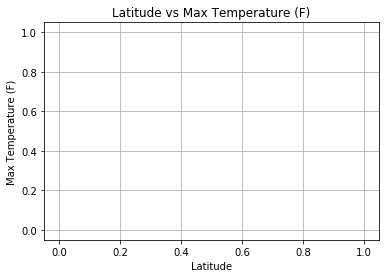

In [10]:
#Creating a scatter plot of the Latitude vs. Max Temperature 
plt.scatter(Lat,Max_Temp, color = 'b', linewidths=.5, edgecolors = 'k')
plt.title("Latitude vs Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b = True)

#Saving the figure to a PNG file 
plt.savefig(output_data_file1)

Observation: The code is analyzing the latitude of each city compared to it's maximum temperature. The higher the latitude, the lower the maximum temperature is the case for most cities. 

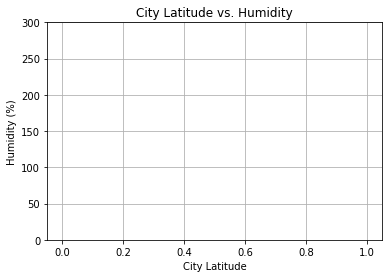

In [11]:
#Creating a scatter plot of the Latitude vs. Humidity 
plt.scatter(Lat,Humidity, color = 'b', linewidths=.5, edgecolors = 'k')
plt.title("City Latitude vs. Humidity")
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0,300)
plt.grid(b = True)

#Saving the figure to a PNG file
plt.savefig(output_data_file2)

Observation: The code is analyzing the latitude of each city compared to its humidity. 

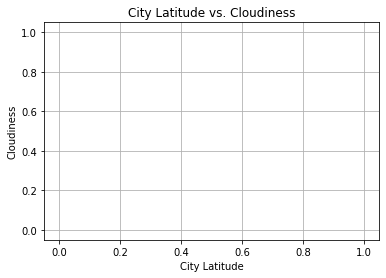

In [12]:
#Creating a scatter plot of the Latitude vs. Cloudiness 
plt.scatter(Lat,Cloudiness, color = 'b', linewidths=.5, edgecolors = 'k')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.grid(b = True)

#Saving the figure to a PNG file
plt.savefig(output_data_file3)

Observation: The code is analyzing the latitude of each city compared to the cloudiness of the city.

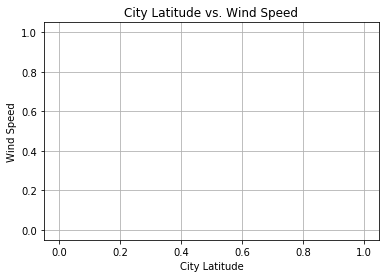

In [13]:
#Creating a scatter plot of the Latitude vs. Wind Speed
plt.scatter(Lat,Wind_Speed, color = 'b', linewidths=.5, edgecolors = 'k')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.grid(b = True)

#Saving the figure to a PNG file
plt.savefig(output_data_file4)

Observation: The code is analyzing the latitude of each city compared to it's wind speed. 

### Task 5: Split the Latitude Data into Northern and Southern Hemispheres

In [14]:
#Splitting the data into northern and southern hemisphere

Lat_north = []
Lat_south = []

Maxtemp_north = []
Maxtemp_south = [] 

Cloudiness_north = []
Cloudiness_south = []

Humidity_north = []
Humidity_south = [] 

Wind_speed_north = []
Wind_speed_south = []


for j in range(len(Lat)): 
    #Every latitude value above 0 we are defining as in the northern hemisphere
    if Lat[j] >= 0:
        #Filling the arrays of interest with the values we want 
        Lat_north.append(Lat[j])
        Maxtemp_north.append(Max_Temp[j])
        Humidity_north.append(Humidity[j])
        Wind_speed_north.append(Wind_Speed[j])
        Cloudiness_north.append(Cloudiness[j])

for j in range(len(Lat)): 
    #Every latitude value above 0 we are defining as in the southern hemisphere
    if Lat[j] <= 0:
        #Filling the arrays of interest with the values we want 
        Lat_south.append(Lat[j])
        Maxtemp_south.append(Max_Temp[j])
        Humidity_south.append(Humidity[j])
        Wind_speed_south.append(Wind_Speed[j])
        Cloudiness_south.append(Cloudiness[j])

### Task 6: Defining a Function to Plot the Linear Regression Given a X and a Y. 

In [15]:
#Defining a function that performs linear regression as we explained in class. 
def Linear_Regression(Xdata, Ydata): 
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Xdata, Ydata)
    vc_fit = vc_slope * np.asarray(Xdata) + vc_int
    return print(f"The r-squared is: {vc_slope}"), plt.scatter(Xdata, Ydata), plt.plot(Xdata,vc_fit,"-",color = 'red'), plt.text(Xdata[-1+10],Ydata[20],f"y = {round(vc_slope,2)}x + {round(vc_int,2)}",color = "red", fontsize = 15)


### Task 7: Using the Function Above to Show the Linear Regression of 
            (1) Max Temp vs. Latitude Linear Regression
            (2) Humidity (%) vs. Latitude Linear Regression
            (3) Cloudiness (%) vs. Latitude Linear Regression
            (4) Wind Speed (mph) vs. Latitude Linear Regression
### For the Northern and Southern Hemisphere

In [16]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear_Regression(Lat_north, Maxtemp_north)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')


ValueError: Inputs must not be empty.

In [ ]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear_Regression(Lat_south, Maxtemp_south)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

Observation: In the northern hemisphere, there is a clear correlation between between the latitude and the maximum temperature. In the souther hemisphere, the correlation is less and the points vary, but there is still a correlation. 

In [ ]:
#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear_Regression(Lat_north, Humidity_north)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear_Regression(Lat_south, Humidity_south)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.ylim(0,300)

Observation: In the northern hemisphere, the data varies greatly. The higher the latitude, the closer the data points get to each other though. In the southern hemisphere, there is not a clear correlation either. 

In [ ]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear_Regression(Lat_north, Cloudiness_north)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

In [ ]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear_Regression(Lat_south, Cloudiness_south)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

Observation: There does not seem to be much correlation between the latitude and the cloudiness and the correlation factor is very high at .52 in the northern hemisphere. In the southern hemisphere, the correlation and variety is even higher than for the northern hemisphere.

In [ ]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear_Regression(Lat_north, Wind_speed_north)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

In [ ]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear_Regression(Lat_south, Wind_speed_south)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

Observation: In the northern hemisphere, the higher the latitude the more outliers for wind speed. A correlation is hard to see. In the southern hemisphere, there are higher wind speeds in higher latitude areas. 